In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Bank Marketing Data Set 

# 1. Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/hellozakhar/machinelearning2020/main/bank-full.csv"
data = pd.read_csv(url)

## Описание задачи

Здесь собраны данные, связанные с кампаниями прямого маркетинга португальского банковского учреждения. Маркетинговые кампании основывались на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы клиент согласился или не согласился оформить срочный банковский депозит.

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному клиенту) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data.shape

(41188, 21)

Метод data_raw.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


А вот последние строки:

In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Мы видим, что столбцы (признаки) имеют имена:
    
- `age` - возраст клиента,
- `job` - тип работы клиента,
- `marital` - семейное положение,
- `education` - уровень образования,
- `default` - имеет ли кредит,
- `housing` - имеет ли кредит за жильё,
- `loan` - имеет ли личный заём,
- `contact` - способ связи,
- `month` - месяц когда звонили клиенту последний раз,
- `day_of_week` - день когда звонили клиенту последний раз,
- `duration` - длительность последнего контакта,
- `campaign` - количество контактов, выполненных во время этой кампании и для этого клиента,
- `pdays` - количество дней, прошедших с момента последнего обращения к клиенту из предыдущей кампании,
- `previous` - количество контактов, выполненных до этой кампании и для этого клиента,
- `poutcome` - результат предыдущей маркетинговой кампании,
- `emp.var.rate` - коэффициент занятости
- `cons.price.idx` - индекс потребительских цен
- `euribor3m` - официально признаваемый коэффициент доверия,
- `nr.employed` - количество работников,
- `y` - клиент оформил депозит.

- Номинальные (категориальные) признаки - `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome`;
- Количественные (числовые) признаки - `age`, `day`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `euribor3m`, `nr.employed`;
- Бинарные признаки - `y`.

Имена столбцов (признаков) можно получить таким образом:

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Покажем, что классы несбалансированы:

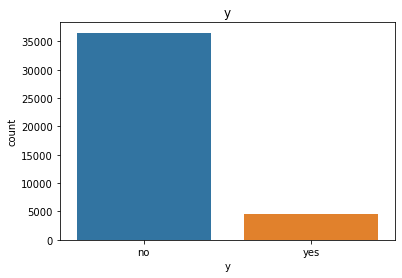

In [7]:
sns.countplot(x=data['y']).set_title('y')
pass

# 2. Визуализация данных и вычисление основных характеристик¶

Сводная информация о признаках:

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Для каждого количественного признака приведены:
1. средние значения (mean) - среднее арифметическое
2. стандартное отклонение - показатель рассеивания значений случайной величины относительно её математического ожидания.
3. минимальное и макимальное значения
4. медиана - это значение делящее распределение пополам. Другими словами это значение ниже которого находятся половина значений, и выше также половина всех значений в распределении.
5. значения квантилей - значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

## Построение диаграмм рассеивания

Построим все возможные диаграммы рассеивания для каждой пары переменных:

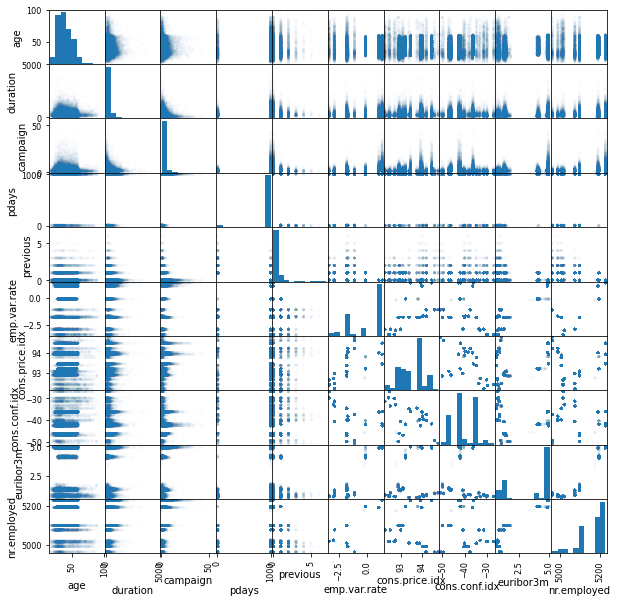

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

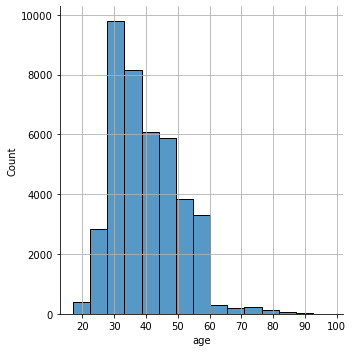

In [10]:
sns.displot(data['age'], bins=15)
plt.grid()
pass

Видно, что клиентами банка являются люди, достигшие 18 лет. 

Можно вычислить матрицу корреляции для количественных признаков:

In [11]:
corr_mat = data.corr()
corr_mat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

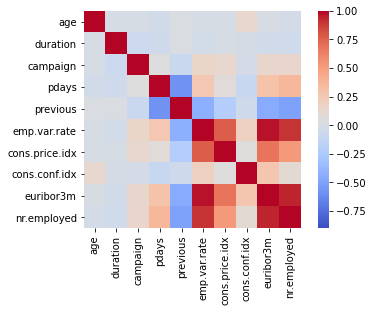

In [12]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin = -0.9)
pass

In [13]:
data['marital'] == 'married'

0        True
1        True
2        True
3        True
4        True
         ... 
41183    True
41184    True
41185    True
41186    True
41187    True
Name: marital, Length: 41188, dtype: bool

Выведем коэффициенты корреляции, большие заданного значения:

In [14]:
corr_mat > 0.05

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,True,False,False,False,False,False,False,True,False,False
duration,False,True,False,False,False,False,False,False,False,False
campaign,False,False,True,True,False,True,True,False,True,True
pdays,False,False,True,True,False,True,True,False,True,True
previous,False,False,False,False,True,False,False,False,False,False
emp.var.rate,False,False,True,True,False,True,True,True,True,True
cons.price.idx,False,False,True,True,False,True,True,True,True,True
cons.conf.idx,True,False,False,False,False,True,True,True,True,True
euribor3m,False,False,True,True,False,True,True,True,True,True
nr.employed,False,False,True,True,False,True,True,True,True,True


In [15]:
corr_mat.where(np.triu(corr_mat > 0.00, k=1)).stack().sort_values(ascending=False)

emp.var.rate    euribor3m         0.972245
euribor3m       nr.employed       0.945154
emp.var.rate    nr.employed       0.906970
                cons.price.idx    0.775334
cons.price.idx  euribor3m         0.688230
                nr.employed       0.522034
pdays           nr.employed       0.372605
                euribor3m         0.296899
cons.conf.idx   euribor3m         0.277686
pdays           emp.var.rate      0.271004
emp.var.rate    cons.conf.idx     0.196041
campaign        emp.var.rate      0.150754
                nr.employed       0.144095
                euribor3m         0.135133
age             cons.conf.idx     0.129372
campaign        cons.price.idx    0.127836
cons.conf.idx   nr.employed       0.100513
pdays           cons.price.idx    0.078889
cons.price.idx  cons.conf.idx     0.058986
campaign        pdays             0.052584
age             previous          0.024365
duration        previous          0.020640
age             euribor3m         0.010767
duration   

Коэффициенты корреляции достаточно низкие.

Наибольшая корреляция достигается между `pdays` и `previous`:

In [16]:
corr_mat.loc['pdays', 'previous']

-0.5875138561367592

Также обратите внимание, что коэффициент корреляции между 'duration', 'previous' очень близок к нулю.

In [17]:
corr_mat.loc['duration', 'previous']

0.020640350701748404

Рассмотрим зависимость количества контрактов от возраста клиента

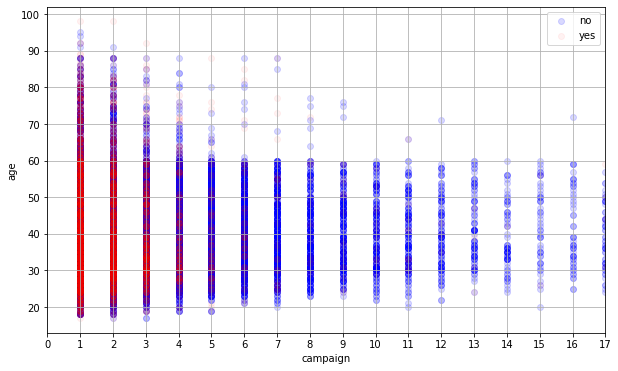

In [18]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['y'] == 'no']['campaign'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no',
            color = 'b')

plt.scatter(data[data['y'] == 'yes']['campaign'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.05,
            label = 'yes',
            color = 'r')

plt.xlabel('campaign')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('age')
plt.legend()
plt.grid()

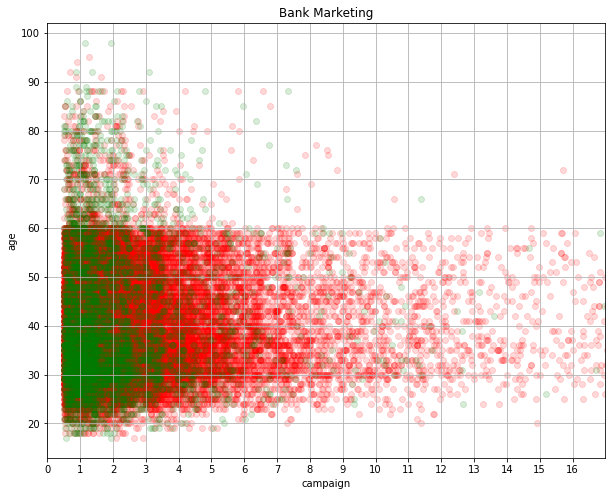

In [19]:
np.random.seed(42)
campaign_rnd = data['campaign'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(campaign_rnd[data['y'] == 'no'],
            data[data['y'] == 'no']['age'],
            alpha = 0.15,
            label = 'no',
            color = 'r')

plt.scatter(campaign_rnd[data['y'] == 'yes'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.15,
            label = 'yes',
            color = 'g')

plt.xlabel('campaign')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('age')
plt.title('Bank Marketing')
plt.grid()

In [75]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['y'] == 'yes']['age'],
            data[data['y'] == 'yes']['marital'],
            alpha = 0.15,
            label = 'yes',
            color = 'b')

plt.scatter(data[data['y'] == 'no']['age'],
            data[data['y'] == 'no']['marital'],
            alpha = 0.15,
            label = 'no',
            color = 'y')

plt.xlabel('age')
plt.ylabel('marital')
plt.grid()

KeyError: 'marital'

<Figure size 720x576 with 0 Axes>

In [21]:
for name in data['education'].unique():
    print(name, data['campaign'][data['education'] == name].iloc[0])

basic.4y 1
high.school 1
basic.6y 1
basic.9y 1
professional.course 1
unknown 1
university.degree 1
illiterate 2


In [22]:
data = data.drop('emp.var.rate', axis = 1)\
           .drop('cons.price.idx', axis = 1)\
           .drop('euribor3m', axis = 1)\
           .drop('nr.employed', axis = 1)\
           .drop('cons.conf.idx', axis=1)\
           .drop('previous', axis=1)

In [23]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,nonexistent,yes


## Подготовка данных

In [24]:
data['loan'].dtype.name

'object'

In [25]:
data['pdays'].dtype.name

'int64'

Для удобства можно завести список с категориальными и численными признаками. В дальнейшем это может пригодиться.

In [26]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays']


In [27]:
for c in categorical_columns:
    print(c, data[c].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


# 4. Обработка пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце матрицы

In [28]:
data.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
poutcome       0
y              0
dtype: int64

Пропущенные значения в этих данных отсутствуют.

# 4.1 Векторизация

In [29]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['contact', 'y'] ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']


In [30]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [31]:
data.at[data['contact'] == 'telephone', 'contact'] = 0
data.at[data['contact'] == 'cellular', 'contact'] = 1
data['contact'].describe()

count     41188
unique        2
top           1
freq      26144
Name: contact, dtype: int64

In [32]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [33]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_succes

In [34]:
len(data_nonbinary.columns)

51

# 5. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:
1. приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;
2. стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [35]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,duration,campaign,pdays
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454
std,10.42125,259.279249,2.770014,186.910907
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000
50%,38.00000,180.000000,2.000000,999.000000
75%,47.00000,319.000000,3.000000,999.000000
max,98.00000,4918.000000,56.000000,999.000000


In [36]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,duration,campaign,pdays
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-1.509481e-16,-3.795266e-18,-6.175932e-17,-3.215625e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.209338e+00,-9.961654e-01,-5.659151e-01,-5.149381e+00
25%,-7.699710e-01,-6.027671e-01,-5.659151e-01,1.954115e-01
50%,-1.942243e-01,-3.019332e-01,-2.049060e-01,1.954115e-01
75%,6.693957e-01,2.341683e-01,1.561030e-01,1.954115e-01
max,5.563242e+00,1.797180e+01,1.928958e+01,1.954115e-01


Объединяем в одну таблицу

In [37]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(41188, 57)


In [38]:
data.describe()

,age,duration,campaign,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.509481e-16,-3.795266e-18,-6.175932e-17,-3.215625e-16,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,...,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,...,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,-2.209338e+00,-9.961654e-01,-5.659151e-01,-5.149381e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699710e-01,-6.027671e-01,-5.659151e-01,1.954115e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.942243e-01,-3.019332e-01,-2.049060e-01,1.954115e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.693957e-01,2.341683e-01,1.561030e-01,1.954115e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.563242e+00,1.797180e+01,1.928958e+01,1.954115e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X Y

Для классификации клиентов, будем использовать все входные признаки.

In [39]:
X = data.drop(('y'), axis = 1)
y = data['y']
feature_names = X.columns

In [40]:
type(feature_names)

pandas.core.indexes.base.Index

In [41]:
feature_names

Index(['age', 'duration', 'campaign', 'pdays', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 

In [42]:
print(X.shape)
print(y.shape)
N, d = X.shape

(41188, 56)
(41188,)


In [43]:
type(X)

pandas.core.frame.DataFrame

In [44]:
type(y)

pandas.core.series.Series

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

28831 12357


In [46]:
N_train + N_test

41188

## k-nearest neighbors algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
knn

KNeighborsClassifier(n_neighbors=10)

Предскажем данные для тестовой и обучающей выборок

In [49]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.08889736741701641 0.09727280084162823


Вычисление ошибок на тестовой и обучающей выборках

In [51]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.08889736741701641 0.09727280084162823


Построение "confusion matrix"

In [53]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[10768   200]
 [ 1002   387]]


In [54]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

Подбор параметров

In [55]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier() 
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.09760317187703704 45


In [56]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.09566092053692206 0.09541150764748725


# PCA (principal component analysis) - Метод главных компонент

In [57]:
from sklearn.decomposition import PCA

Сокращаем размерность признаков

In [58]:
pca_model = PCA(n_components = 2)
pca_model.fit(X)

PCA(n_components=2)

Главные компоненты по строкам

In [59]:
print(pca_model.components_)

[[-1.67893795e-01 -4.50221803e-01  5.04145843e-01  6.82932686e-01
  -9.49694800e-04  2.48511256e-02  7.27877832e-04 -1.49366771e-03
  -4.95404737e-03 -2.53639413e-02  1.57032729e-03  1.04391253e-02
  -7.48537837e-03  5.36132388e-03 -1.96089031e-03 -7.42159988e-04
  -4.45713470e-03 -7.52308067e-03  1.21505168e-02 -1.70301416e-04
  -8.56278151e-03  4.15433320e-03  1.31637671e-02  8.53582401e-03
  -1.14532428e-04 -2.73867708e-04 -1.23440972e-02 -4.55864548e-03
  -3.21320881e-02  3.21277374e-02  4.35061440e-06  1.09936019e-02
   7.39001112e-04 -1.17326030e-02 -1.90787238e-03  7.39001112e-04
   1.16887127e-03 -1.61185374e-02 -1.20413797e-03 -4.79759302e-03
   2.88048723e-02  2.48087364e-02 -7.13973601e-03  2.78571743e-02
  -2.01107909e-02 -1.64037325e-02 -1.56962552e-02  1.13407530e-02
   6.17659242e-03 -3.80226406e-03 -9.15773693e-03 -4.55734446e-03
  -2.17645422e-02  1.38685208e-01 -1.16920666e-01 -8.28183372e-02]
 [ 9.02559345e-01 -1.27884703e-01  1.61655323e-01  1.32158523e-02
  -6.5284

Дисперсии по главным компонентам

In [60]:
print(pca_model.explained_variance_)

[1.1577957  1.12104844]


Среднеквадратические отклонения

In [61]:
print(np.sqrt(pca_model.explained_variance_))

[1.07600916 1.05879575]


In [62]:
X_PCA = pca_model.fit(X).transform(X)
print(X.shape)
print(X_PCA.shape)
print(X_PCA)

(41188, 56)
(41188, 2)
[[-0.338672    1.53576163]
 [-0.06700976  1.71421921]
 [ 0.03451253 -0.27248876]
 ...
 [-0.20764643  1.54170298]
 [-0.57011571  0.28340154]
 [-0.55083763  3.16843142]]


## Применение KNN с числом соседей, равным 45

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

28831 12357


In [65]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

0.09444694946411848 0.09468317552804079


График

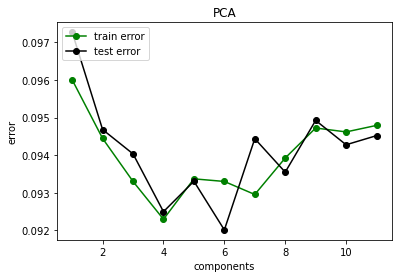

In [72]:
comp = range(1, 12, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    pca = PCA(n_components = temp)
    X_PCA = pca.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)
    err_train_mas.append(np.mean(knn.predict(X_train) != Y_train))
    err_test_mas.append(np.mean(knn.predict(X_test) != Y_test))
plt.plot(comp, err_train_mas, 'g-o', label = 'train error')
plt.plot(comp, err_test_mas,  'k-o', label = 'test error') 
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend(loc = 2)

Как видно из графика, при 6 компонентах ошибка достигает своего минимума.

In [67]:
err_test_PCA = np.min(err_test_mas)
print(err_test_PCA)

0.09201262442340374


In [68]:
print(err_test - err_test_PCA)

0.0026705511046370423


# LDA (Latent Dirichlet allocation)

In [76]:
from sklearn import discriminant_analysis
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X, y)
X_lda = lda.transform(X)

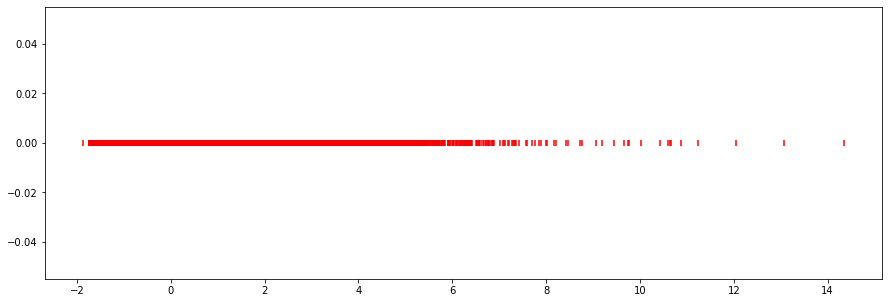

In [80]:
colors = []
for i in y:
    if i == 'r':
        colors.append('y')
    else:
        colors.append('r')

fig = plt.figure(figsize = (15, 5))
ax = fig.subplots()

ax.scatter(X_lda[:, 0], [0] * len(X_lda), c = colors, marker = '|')
plt.show()

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_lda, y, test_size = 0.3, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

0.09156810377718429 0.09435947236384236


# Вывод

- RCA c KNN помог улучшить ошибку;
- LDA не помог из-за несбалансированности;
